# 将所有数据混合在一起，综合训练模型

In [3]:
import pandas as pd
data=pd.read_csv("C:\\Users\\xujy\\Desktop\\doh-tunneling\\all\\all.csv")
# 删除第一列数据
data = data.drop(data.columns[0], axis=1)

# 将label里的字段值，Benign转换成1，Malicious转换成0
data['label'] = data['label'].map({'Benign': 1, 'Malicious': 0})

data.head()

,src2dst_min_length,src2dst_max_length,src2dst_stddev_length,src2dst_mean_length,src2dst_min_time,src2dst_max_time,src2dst_mean_time,src2dst_stddev_time,dst2src_min_length,dst2src_max_length,...,dst2src_stddev_time,bidirectional_min_length,bidirectional_max_length,bidirectional_stddev_length,bidirectional_mean_length,bidirectional_min_time,bidirectional_max_time,bidirectional_mean_time,bidirectional_stddev_time,label
0,1,512,72.740045,109.050000,0.000026,5.177011,0.225844,0.828923,26,63030,...,0.760427,1,63030,7548.046770,1449.322314,9.536743e-07,4.852633,0.111269,0.544259,1
1,1,512,137.383987,131.800000,0.000051,1.805980,0.218042,0.562142,30,32218,...,0.478737,1,32218,9365.271618,3711.833333,0.000000e+00,1.778680,0.086506,0.361320,1
2,0,512,51.268203,102.479187,0.000018,45.576902,0.512576,2.721545,19,47691,...,4.235664,0,47691,838.710478,142.417442,0.000000e+00,45.033883,0.266081,1.957148,1
3,0,512,132.674001,101.384615,0.000040,45.029961,11.746661,19.266863,19,28958,...,44.813863,0,28958,6021.647945,2190.517241,0.000000e+00,45.027481,6.639408,15.690340,1
4,0,512,155.982193,100.000000,0.000054,45.073986,16.898492,21.800842,19,61153,...,51.745176,0,61153,18087.361651,7728.809524,0.000000e+00,45.073986,9.002822,17.998406,1


In [8]:
# 选择特定的特征列和标签列
X = data.iloc[:, :-1]
y = data['label']

# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [12]:
# model_utils.py
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report, y_pred
# 交叉验证
def cross_validate_model(model, X, y, cv=5, scoring='roc_auc'):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    return cv_scores

def plot_roc_curve(model, X_test, y_test):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Example usage:
# accuracy, report, y_pred = train_and_evaluate_model(model, X_train, X_test, y_train, y_test)
# plot_roc_curve(model, X_test, y_test)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

逻辑回归

Accuracy: 0.9483793091206021
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     24273
           1       0.98      0.64      0.77      3894

    accuracy                           0.95     28167
   macro avg       0.96      0.82      0.87     28167
weighted avg       0.95      0.95      0.94     28167



d:\software\miniconda3\envs\python_3.10\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


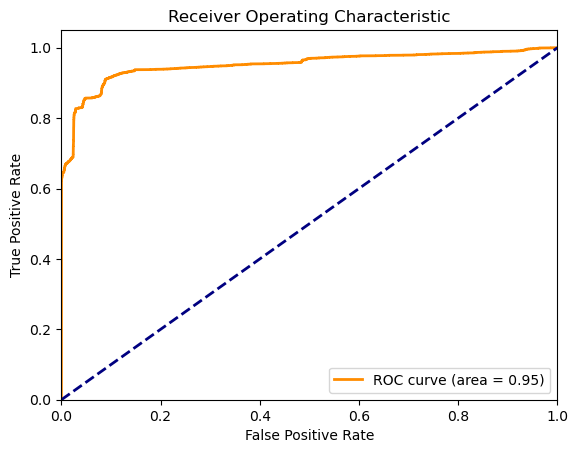

In [15]:
lr_model = LogisticRegression()
accuracy, report, y_pred = train_and_evaluate_model(lr_model, X_train, X_test, y_train, y_test)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
plot_roc_curve(lr_model, X_test, y_test)

决策树

Accuracy: 0.999928994923137
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24273
           1       1.00      1.00      1.00      3894

    accuracy                           1.00     28167
   macro avg       1.00      1.00      1.00     28167
weighted avg       1.00      1.00      1.00     28167



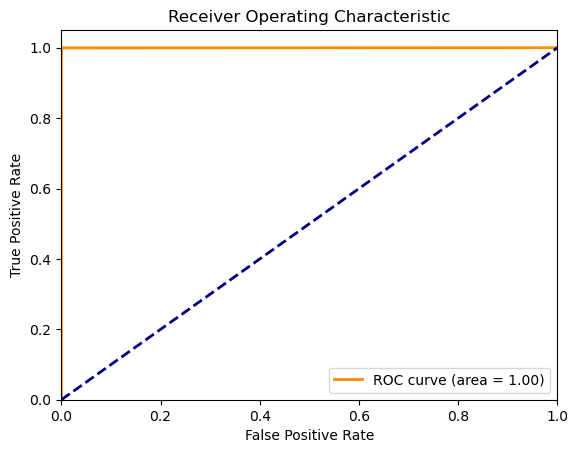

In [16]:
df_model = DecisionTreeClassifier()
accuracy, report, y_pred = train_and_evaluate_model(df_model, X_train, X_test, y_train, y_test)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
plot_roc_curve(df_model, X_test, y_test)

随机森林

Accuracy: 0.9999644974615685
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24273
           1       1.00      1.00      1.00      3894

    accuracy                           1.00     28167
   macro avg       1.00      1.00      1.00     28167
weighted avg       1.00      1.00      1.00     28167



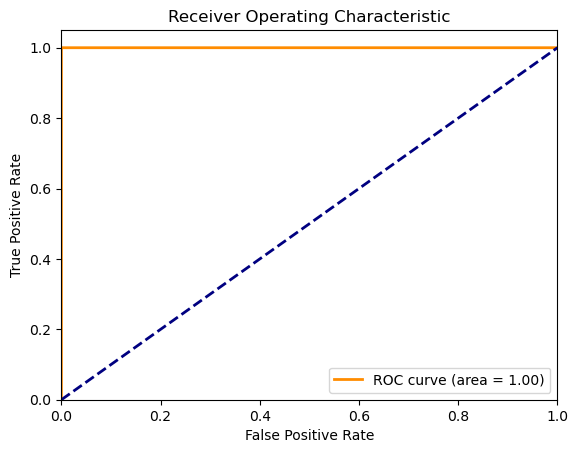

In [17]:
rf_model = RandomForestClassifier()
accuracy, report, y_pred = train_and_evaluate_model(rf_model, X_train, X_test, y_train, y_test)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
plot_roc_curve(rf_model, X_test, y_test)